Total Sales by Store
     Store    DailySales
0  Central  1.336166e+06
1     East  1.310329e+06
2    North  1.312170e+06
3    South  1.326552e+06
4     West  1.326688e+06

Average Profit Margin by Store
     Store  ProfitMargin
0  Central      0.281399
1     East      0.282229
2    North      0.280544
3    South      0.277989
4     West      0.279103


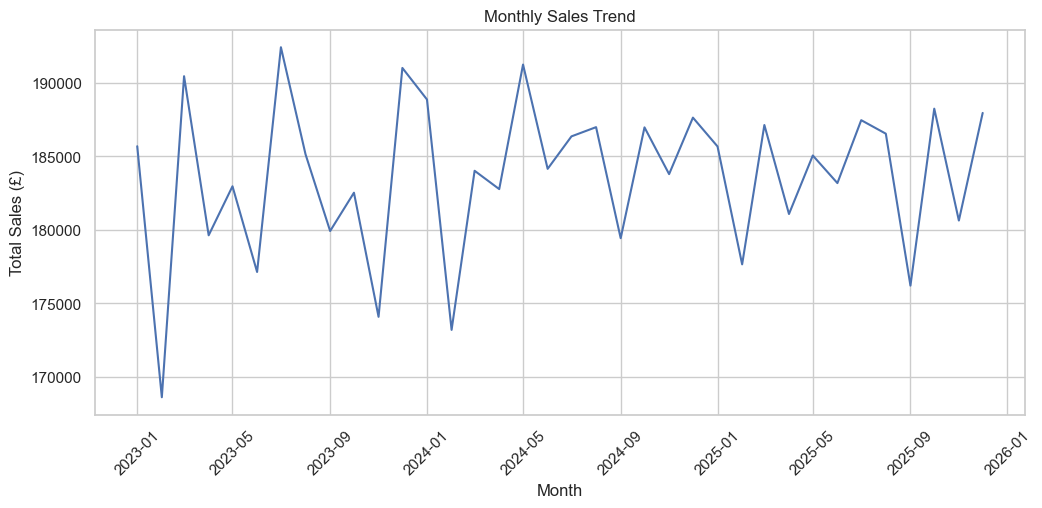

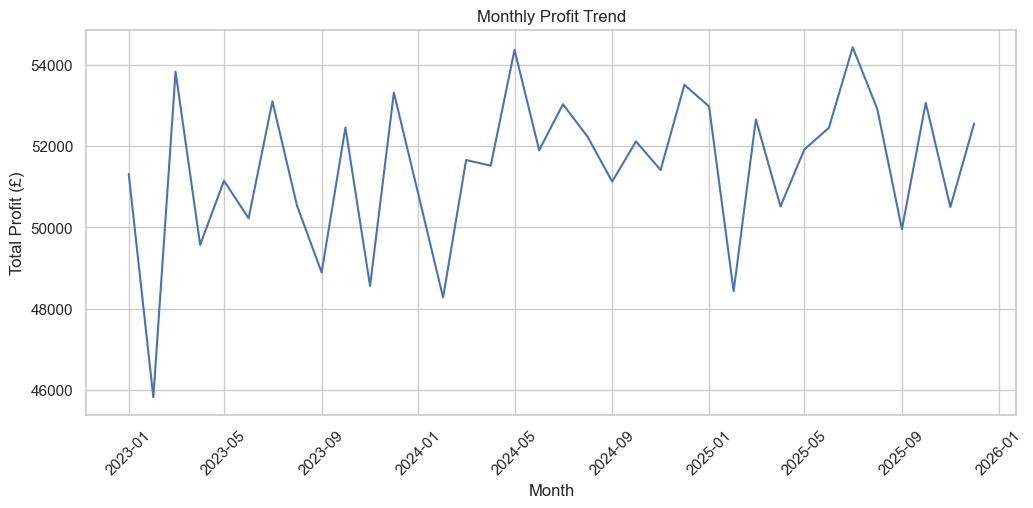

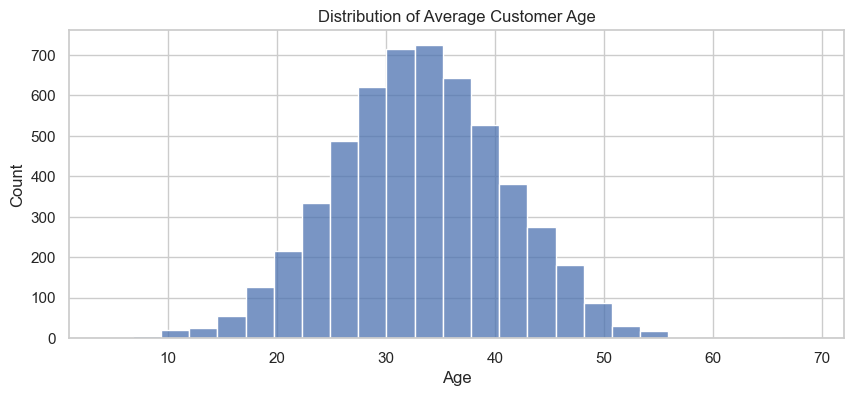

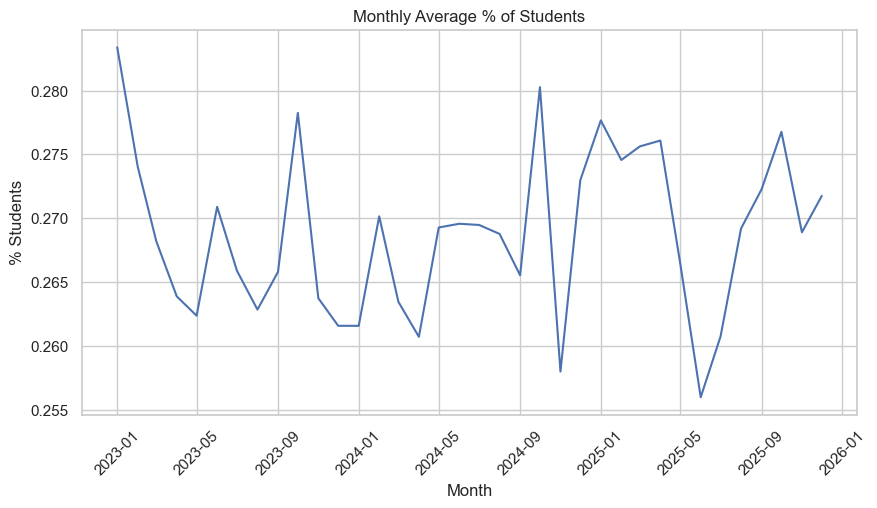

Dataset saved to Costa_Sales_Demo_Data.csv


In [4]:
# ===============================
# COSTA SALES + PROFIT + DEMO DATA
# ===============================

# 1) Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better chart styles
sns.set(style="whitegrid")

# ---------------------------------
# 2) Generate Synthetic Dataset
# ---------------------------------

np.random.seed(42)  # for reproducibility

# Create 3 years of daily data
dates = pd.date_range(start="2023-01-01", end="2025-12-31", freq="D")

# Store list (simulate multiple outlets)
stores = ["Central", "North", "East", "South", "West"]

data = []

for d in dates:
    for store in stores:
        # daily sales (simulate typical coffee shop revenue)
        sales = np.random.normal(loc=1200, scale=300)  # daily sales in £
        sales = max(sales, 50)  # no negatives
        # profit margin (set between 18–38% just for example)
        margin = np.random.uniform(0.18, 0.38)
        profit = sales * margin

        # DEMOGRAPHICS
        avg_age = np.random.normal(33, 8)  # average age of customers
        perc_students = np.random.uniform(0.12, 0.42)  # % of student customers

        data.append([
            d, store, sales, profit, margin, avg_age, perc_students
        ])

columns = [
    "Date", "Store", "DailySales", "DailyProfit",
    "ProfitMargin", "AvgCustomerAge", "PctStudents"
]

df = pd.DataFrame(data, columns=columns)

# ---------------------------------
# 3) Quick Look at the Data
# ---------------------------------
df.head()

# ---------------------------------
# 4) Basic Aggregations
# ---------------------------------

# Total sales by store
sales_by_store = df.groupby("Store")["DailySales"].sum().reset_index()

# Average profit margin per store
margin_by_store = df.groupby("Store")["ProfitMargin"].mean().reset_index()

print("Total Sales by Store")
print(sales_by_store)

print("\nAverage Profit Margin by Store")
print(margin_by_store)

# ---------------------------------
# 5) Time Series Trends
# ---------------------------------

# Convert Date to Month (datetime) so charts work
df["Month"] = df["Date"].dt.to_period("M").dt.to_timestamp()

monthly_sales = df.groupby("Month")["DailySales"].sum().reset_index()
monthly_profit = df.groupby("Month")["DailyProfit"].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12, 5))
sns.lineplot(x="Month", y="DailySales", data=monthly_sales)
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales (£)")
plt.show()

# Plot monthly profit
plt.figure(figsize=(12, 5))
sns.lineplot(x="Month", y="DailyProfit", data=monthly_profit)
plt.title("Monthly Profit Trend")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Profit (£)")
plt.show()

# ---------------------------------
# 6) Demographics Analysis
# ---------------------------------

# Average age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df["AvgCustomerAge"], bins=25)
plt.title("Distribution of Average Customer Age")
plt.xlabel("Age")
plt.show()

# % Students over time
monthly_students = df.groupby("Month")["PctStudents"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="PctStudents", data=monthly_students)
plt.title("Monthly Average % of Students")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("% Students")
plt.show()

# ---------------------------------
# 7) Save the Dataset
# ---------------------------------
df.to_csv("Costa_Sales_Demo_Data.csv", index=False)
print("Dataset saved to Costa_Sales_Demo_Data.csv")